# Data analysis and exploration

In [1]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def basic_preprocessing(data):

    features = ['StoreID', 'Date', 'Year', 'Month', 'Day', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'AssortmentType', 'NearestCompetitor', 'Region', 'NumberOfCustomers',
       'NumberOfSales', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
       'CloudCover', 'Events', 'Max_Dew_PointC', 'Max_Gust_SpeedKm_h',
       'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC',
       'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC',
       'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC',
       'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC',
       'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC',
       'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees']

    data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
    data["Month"] = data["Date"].dt.month
    data["Year"] = data["Date"].dt.year
    data["Day"] = data["Date"].dt.day

    return data[features]

In [3]:
data = pd.read_csv("train.csv")

FileNotFoundError: File b'train.csv' does not exist

In [ ]:
features = data.columns.values

In [ ]:
features

In [4]:
data['StoreID'].nunique()

NameError: name 'data' is not defined

In [7]:
data_point_per_store = data.groupby("StoreID", as_index=False).agg({
    "Date" : "count"
})

In [8]:
data_point_per_store.head()

,StoreID,Date
0,1000,729
1,1001,729
2,1002,729
3,1003,729
4,1004,545


In [9]:
data_point_per_store["Date"].value_counts()

729    624
545    125
Name: Date, dtype: int64

In [10]:
data = basic_preprocessing(data)

In [11]:
number_of_open_days = data.groupby("StoreID", as_index=False).agg({
    "IsOpen" : "sum"
})

In [12]:
number_of_open_days

,StoreID,IsOpen
0,1000,598
1,1001,511
2,1002,607
3,1003,605
4,1004,446
5,1005,603
6,1006,607
7,1007,607
8,1008,603
9,1009,603


In [13]:
s_types_counts = data[(data["Year"] == 2017) & (data["Month"] == 1) & (data["Day"] == 1)].groupby("StoreType").agg({
    "StoreID" : "count"
}).reset_index()

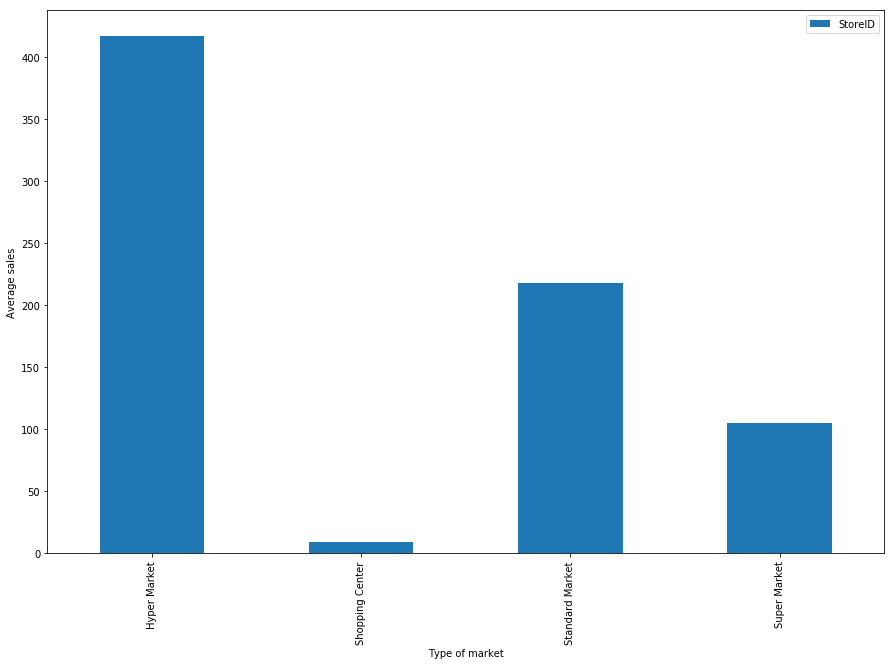

In [14]:
s_types_counts.plot(x=s_types_counts["StoreType"].unique(), kind="bar")
plt.xlabel('Type of market')
plt.ylabel('Average sales')
plt.show()

In [15]:
regions_counts = data[(data["Year"] == 2017) & (data["Month"] == 1) & (data["Day"] == 1)].groupby("Region").agg({
    "StoreID" : "count"
}).reset_index()

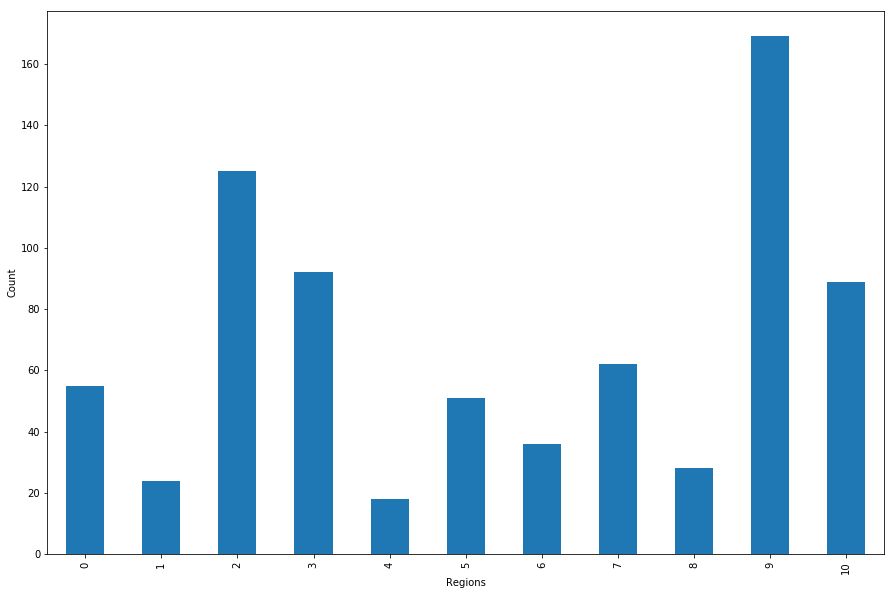

In [16]:
for r in regions_counts["Region"].unique():
    regions_counts["StoreID"].plot(kind='bar')
    plt.xlabel('Regions')
    plt.ylabel('Count')
plt.show()

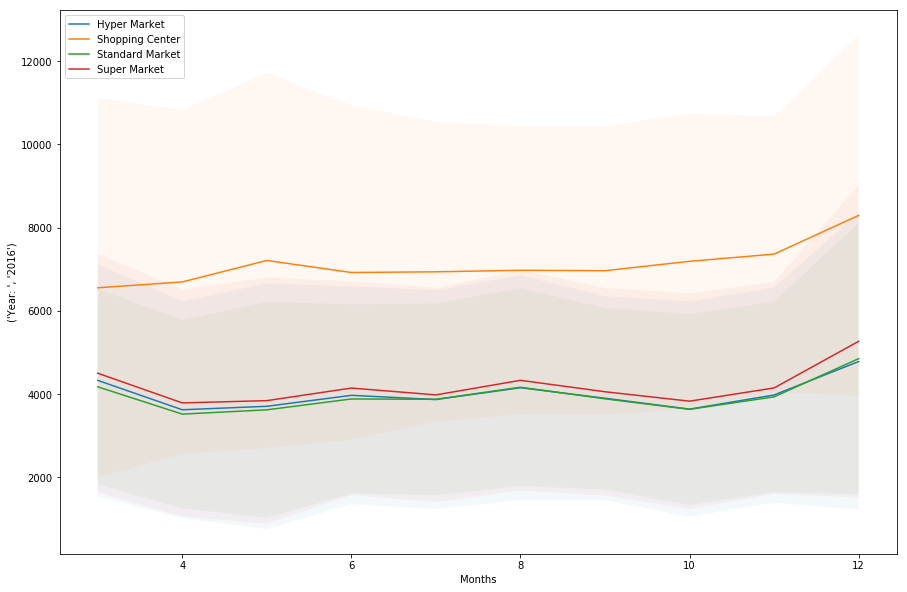

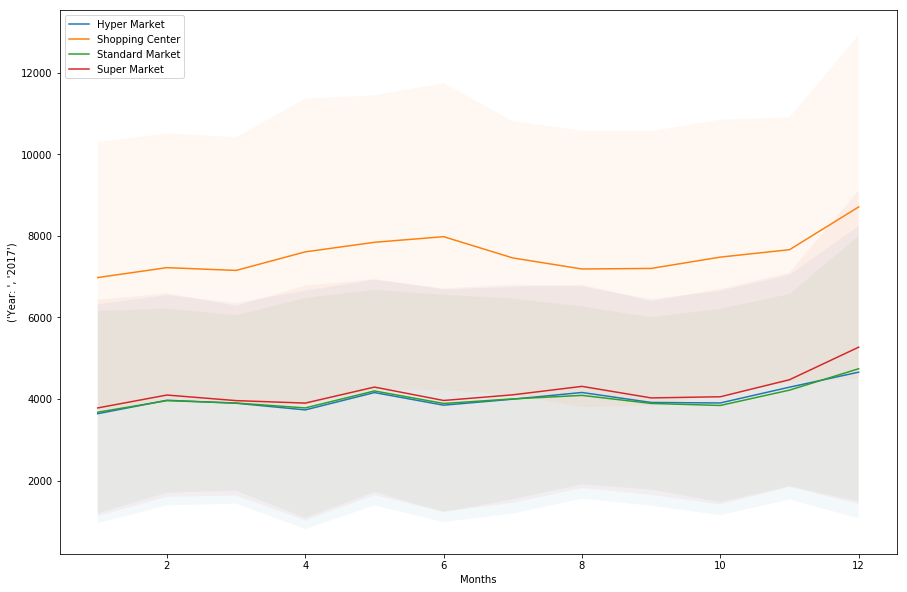

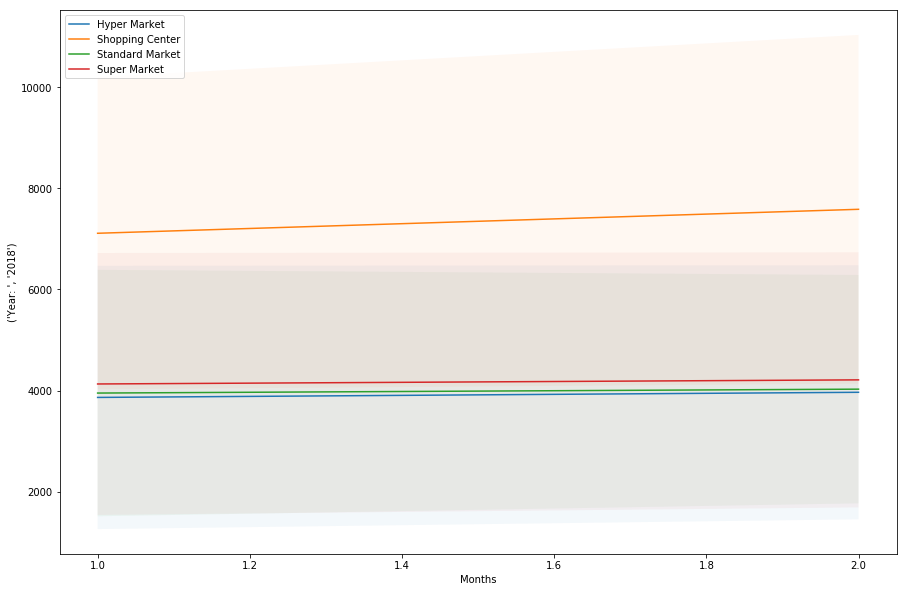

In [17]:
for y in data["Date"].dt.year.unique():
    avg_month_sales_per_type = data[data["Date"].dt.year == y].groupby(["Month", "StoreType"]).agg({
        "NumberOfSales" : ["mean", "std"]
    }).reset_index()
    s_types = avg_month_sales_per_type["StoreType"].unique()
    fig, ax = plt.subplots(1)
    for t in s_types:
        Y = np.array(avg_month_sales_per_type[avg_month_sales_per_type["StoreType"] == t]["NumberOfSales"]["mean"])
        std = np.array(avg_month_sales_per_type[avg_month_sales_per_type["StoreType"] == t]["NumberOfSales"]["std"])
        X = data[data["Date"].dt.year == y]["Date"].dt.month.unique()
        ax.fill_between(X, Y+std, Y-std, alpha=0.05)
        ax.plot(X, Y, label=t)
        y_plt = 'Year: ', str(y)
        x_plt = 'Months'
        plt.ylabel(y_plt)
        plt.xlabel(x_plt)
    ax.legend(loc='upper left')

And the average number of sales per year per region

In [18]:
regions = np.sort(data["Region"].unique())
avg_month_sales_per_region = data.groupby(["Year", "Month", "Region"]).agg({
    "NumberOfSales" : "mean"
}).reset_index()

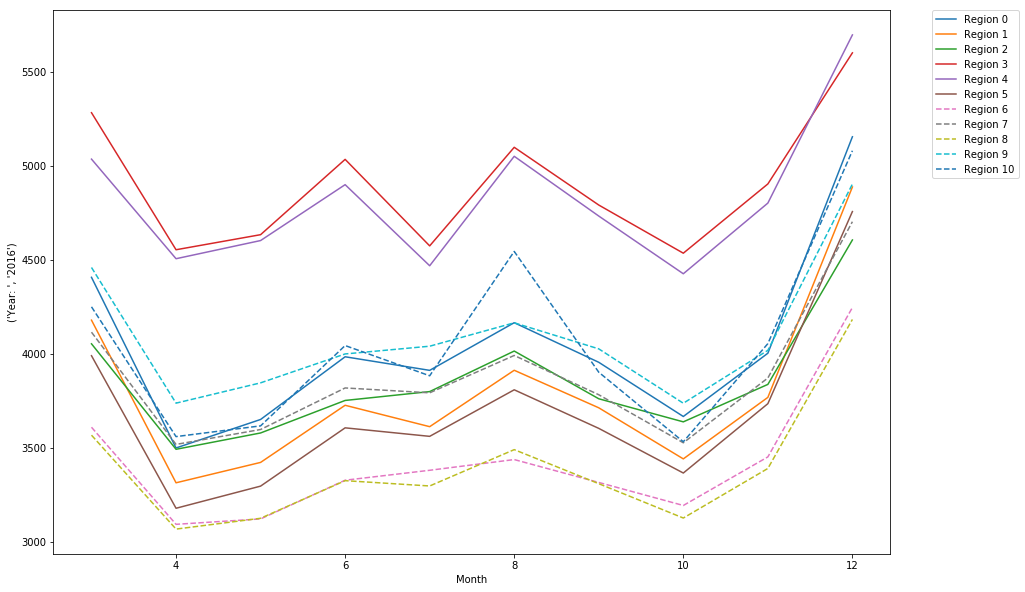

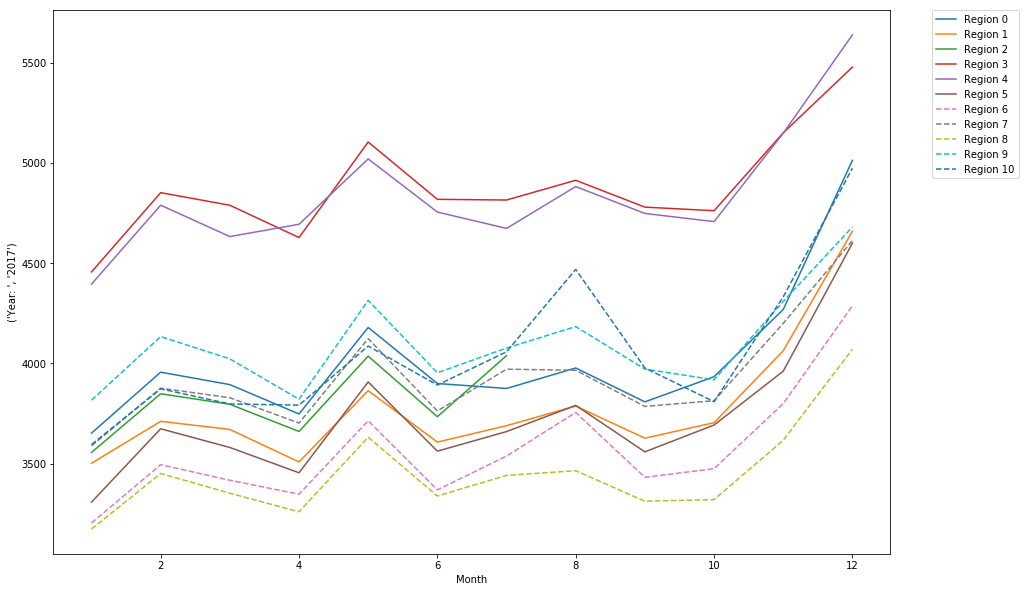

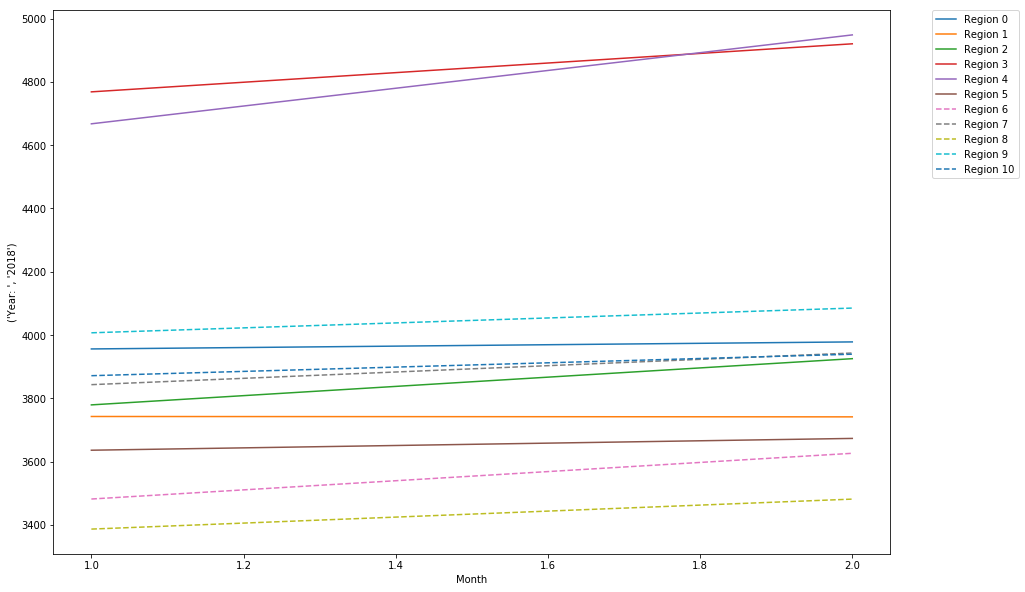

In [19]:
for y in data["Year"].unique():
    count = 0
    for r in regions:
        func = avg_month_sales_per_region[(avg_month_sales_per_region["Year"] == y) & 
                                          (avg_month_sales_per_region["Region"] == r)]["NumberOfSales"]
        #norm = np.sum(x[(x["Region"] == r)]["NumberOfSales"])
        x_axes = np.array(avg_month_sales_per_region[(avg_month_sales_per_region["Year"] == y) & 
                                                     (avg_month_sales_per_region["Region"] == r)]["Month"])
        if count > 5:
            plt.plot(x_axes, func, label="Region "+ str(r), linestyle='--')
        else:
            plt.plot(x_axes, func, label="Region "+ str(r))
        count += 1
    y_plt = 'Year: ', str(y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(y_plt)
    plt.xlabel("Month")
    plt.show()

As shown by the previous graph there is a region that in 2017 have a big dropin the number of sales

In [20]:
avg_month_sales_2017_per_region = data[data["Year"] == 2017].groupby(["Year", "Month", "Region"]).agg({
    "NumberOfSales" : "sum"
}).reset_index()

In [21]:
avg_month_sales_2017_per_region["Region"].value_counts()

10    12
9     12
8     12
7     12
6     12
5     12
4     12
3     12
1     12
0     12
2      7
Name: Region, dtype: int64

In [22]:
data[(data["Region"] == 2) & (data["Year"] == 2017)].groupby("Month").agg({
    "NumberOfSales" : "sum"
}).reset_index()

,Month,NumberOfSales
0,1,13778288
1,2,13468955
2,3,14708781
3,4,13725784
4,5,15639025
5,6,14002218
6,7,1514436


In [23]:
data[(data["Region"] == 2) & (data["Year"] == 2017) & (data["Month"] == 7)].groupby("Day").agg({
    "StoreID" : "count"
}).reset_index()

,Day,StoreID
0,1,125
1,2,125
2,3,125


We plot average number of sales for month

In [24]:
data[(data["Region"] == 2) & (data["Year"] == 2017) & (data["Month"] > 7)].groupby("Day").agg({
    "StoreID" : "count"
}).reset_index()

,Day,StoreID


In [25]:
data[(data["Region"] == 2) & (data["Year"] == 2018)].groupby(["Month", "Day"]).agg({
    "StoreID" : "count"
}).reset_index()

,Month,Day,StoreID
0,1,4,125
1,1,5,125
2,1,6,125
3,1,7,125
4,1,8,125
5,1,9,125
6,1,10,125
7,1,11,125
8,1,12,125
9,1,13,125


As result, region 2 has no value between the 4th of july of 2017 and the 3rd of january of 2018.

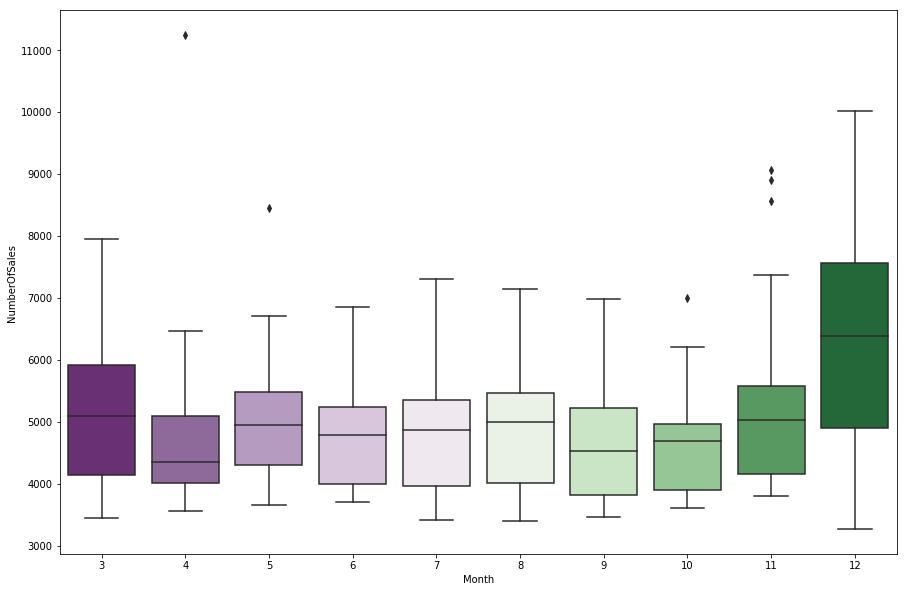

In [26]:
avg_sales_month_year = data[data["IsOpen"] == 1].groupby(["Year", "Month", "Day"]).agg({
    "NumberOfSales" : "mean"
}).reset_index()

sns.boxplot(x=avg_sales_month_year[avg_sales_month_year["Year"] == 2016]["Month"], y=avg_sales_month_year[avg_sales_month_year["Year"] == 2016]["NumberOfSales"], data=avg_sales_month_year[avg_sales_month_year["Year"] == 2016], palette="PRGn")

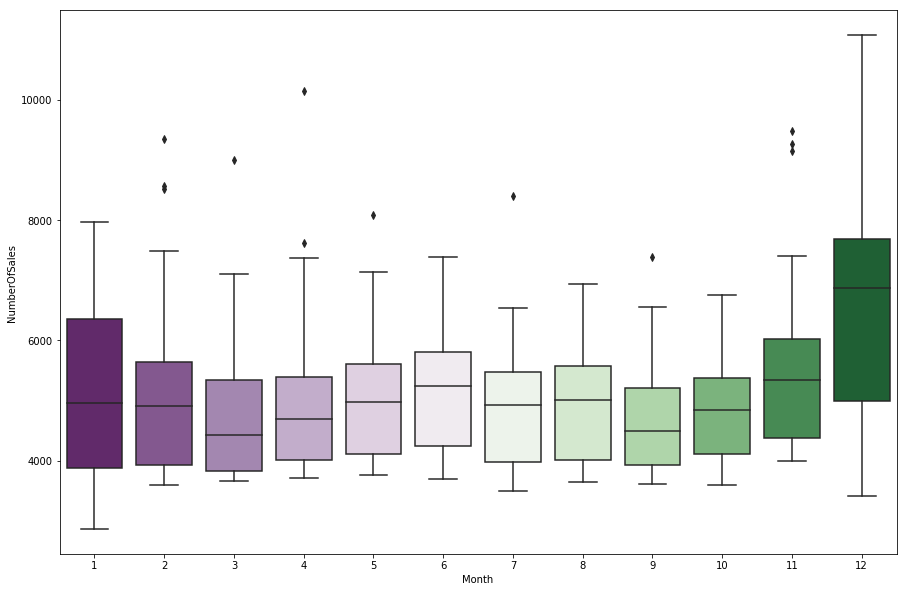

In [27]:
sns.boxplot(x=avg_sales_month_year[avg_sales_month_year["Year"] == 2017]["Month"], y=avg_sales_month_year[avg_sales_month_year["Year"] == 2017]["NumberOfSales"], data=avg_sales_month_year[avg_sales_month_year["Year"] == 2017], palette="PRGn")


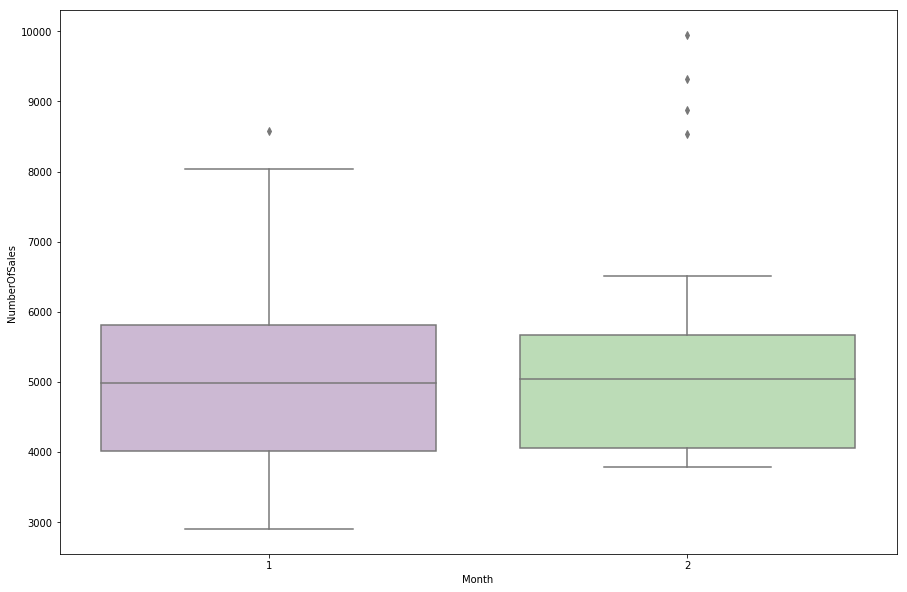

In [28]:
sns.boxplot(x=avg_sales_month_year[avg_sales_month_year["Year"] == 2018]["Month"], y=avg_sales_month_year[avg_sales_month_year["Year"] == 2018]["NumberOfSales"], data=avg_sales_month_year[avg_sales_month_year["Year"] == 2018], palette="PRGn")


We show the average month sales per gdp

In [29]:
avg_month_sales_per_gdp = data.groupby(["Year", "Month", "Region_GDP"]).agg({
    "NumberOfSales" : "mean",
}).reset_index()

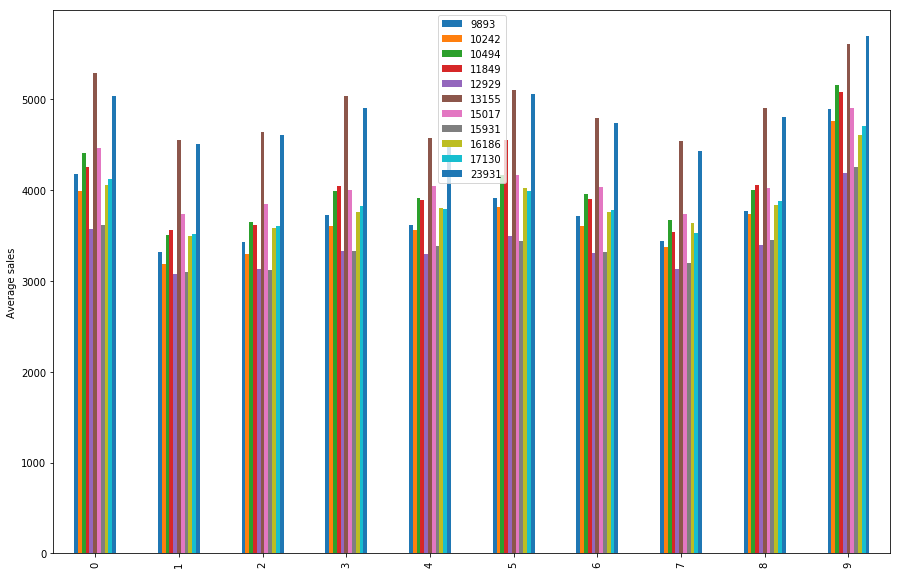

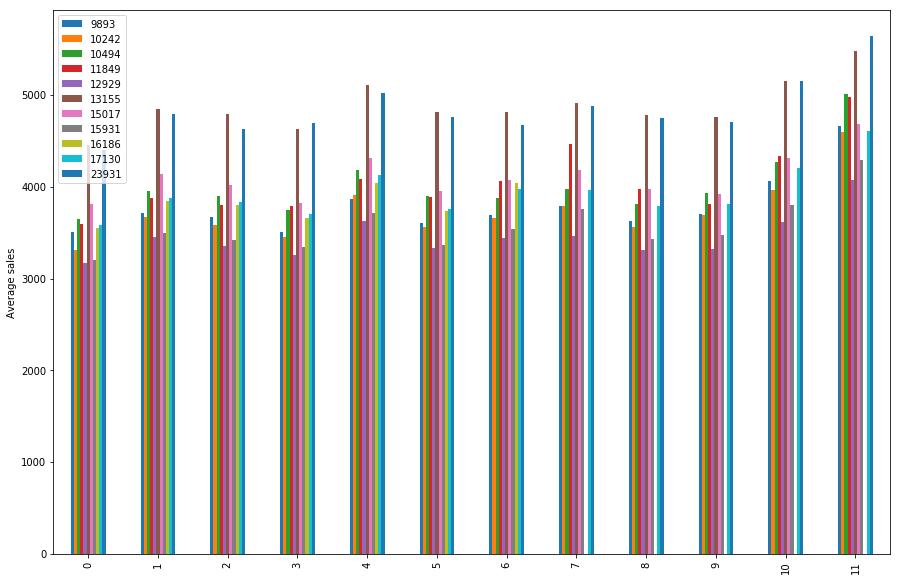

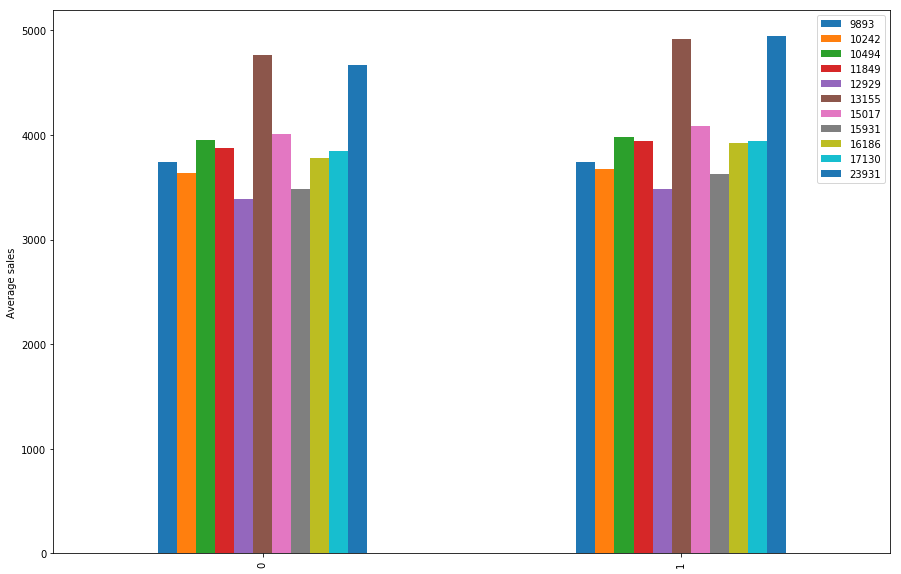

In [30]:
for y in avg_month_sales_per_gdp["Year"].unique():
    p = pd.DataFrame()
    for g in sorted(avg_month_sales_per_gdp["Region_GDP"].unique()):
        Y = np.array(avg_month_sales_per_gdp[(avg_month_sales_per_gdp["Region_GDP"] == g) & (avg_month_sales_per_gdp["Year"] == y)]["NumberOfSales"])
        #n = np.array(avg_month_sales_per_gdp[(avg_month_sales_per_gdp["Region_GDP"] == g) & (avg_month_sales_per_gdp["Year"] == y)]["StoreID"])
        p[g] = pd.Series(Y)
    p.plot(kind='bar')
    plt.ylabel('Average sales')

We study the trend of Number of Sales with respect to the Assortment type of stores

In [31]:
average_sales_per_assortment_type = data.groupby(["Year", "Month", "AssortmentType"]).agg({
    "NumberOfSales" : "mean"
}).reset_index()

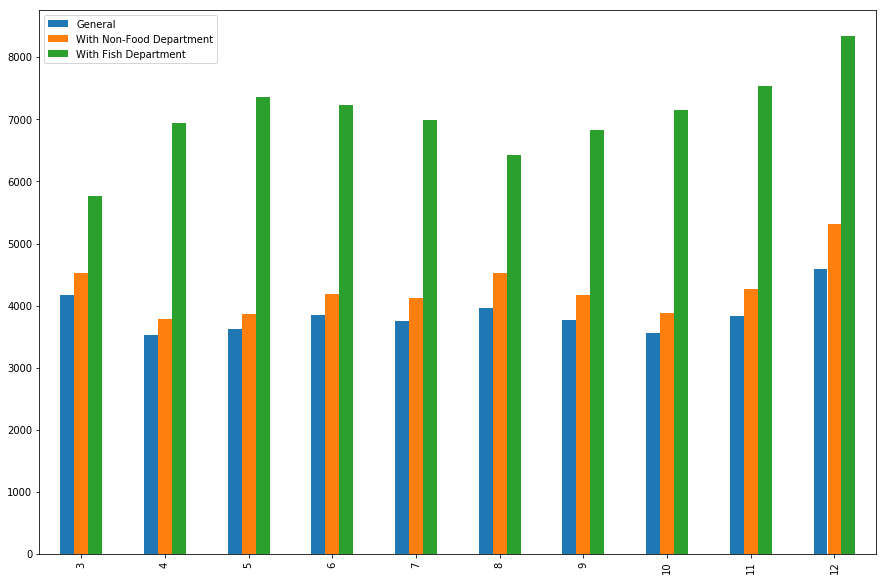

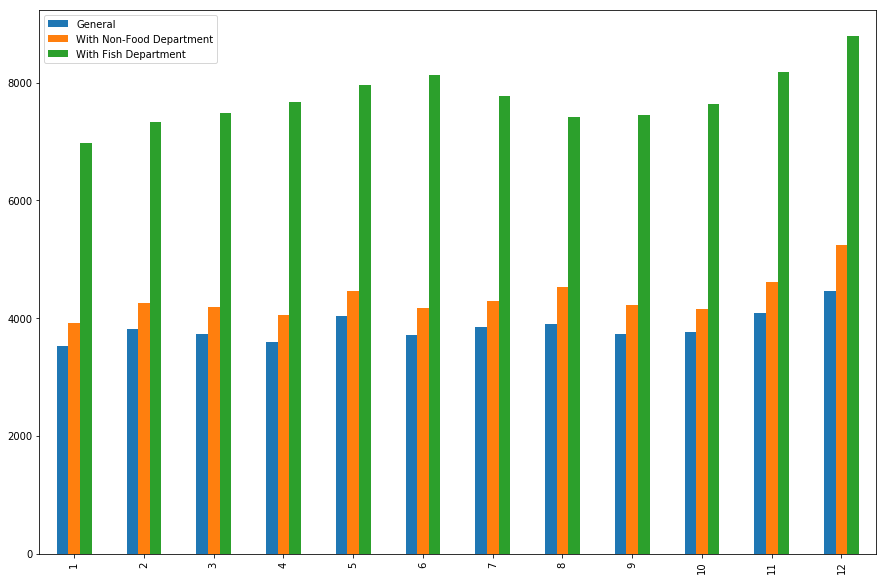

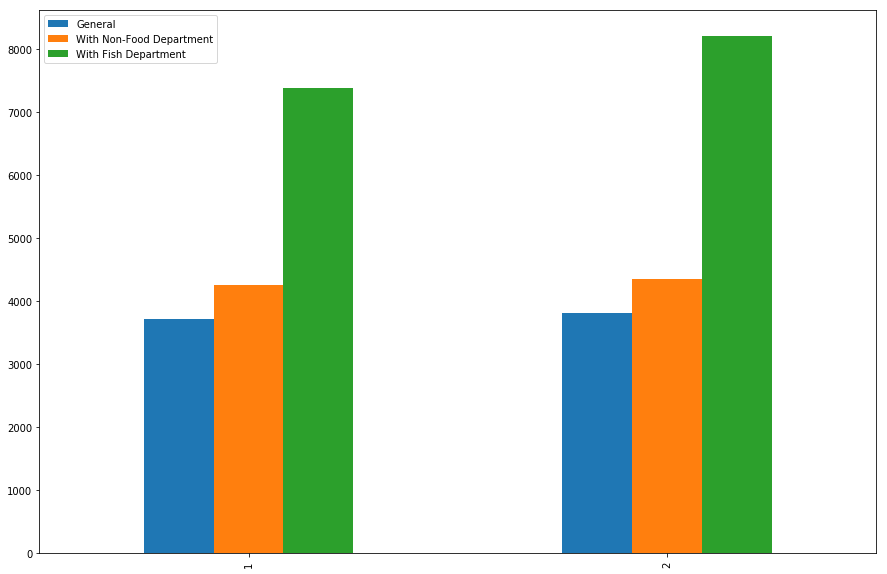

In [32]:
for y in data["Year"].unique():
    p = pd.DataFrame()
    for a in data["AssortmentType"].value_counts().index.tolist():
        Y = np.array(average_sales_per_assortment_type[(average_sales_per_assortment_type["AssortmentType"] == a) & (average_sales_per_assortment_type["Year"] == y)]["NumberOfSales"])
        p[a] = pd.Series(Y)
    months = average_sales_per_assortment_type[(average_sales_per_assortment_type["Year"] == y)]["Month"].unique()
    p.plot(x = months, kind='bar')

We show the correlation between the meteo events and the number of sales

Text(0,0.5,'Average number of sales')

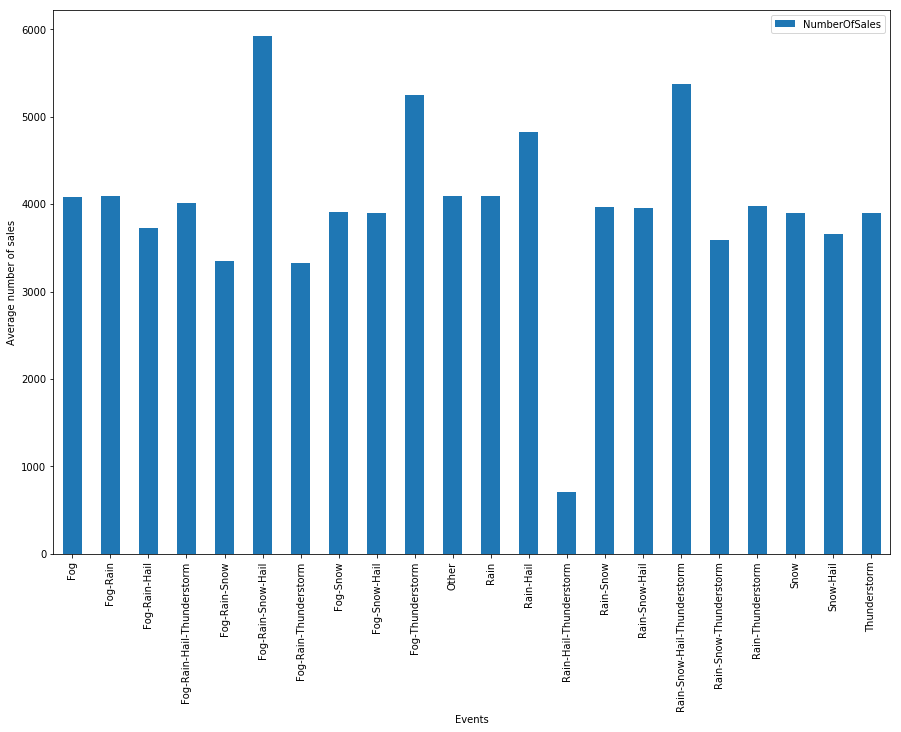

In [33]:
data["Events"] = data["Events"].fillna(value="Other")
avg_sales_for_meteo_event = data.groupby("Events").agg({
    "NumberOfSales" : "mean"
})
avg_sales_for_meteo_event.plot(kind="Bar")
plt.ylabel('Average number of sales')

In [34]:
data = data.drop(['Max_Dew_PointC','Max_Gust_SpeedKm_h', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
            'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Min_Dew_PointC', 'Min_Humidity', 
            'Min_Sea_Level_PressurehPa', 'Min_TemperatureC', 'Min_VisibilitykM'], axis = 1)

In [35]:
categorical_variables_mask = data.dtypes==object
categorical_variables = data.columns[categorical_variables_mask].tolist()
numerical_variables = data.columns[~categorical_variables_mask]

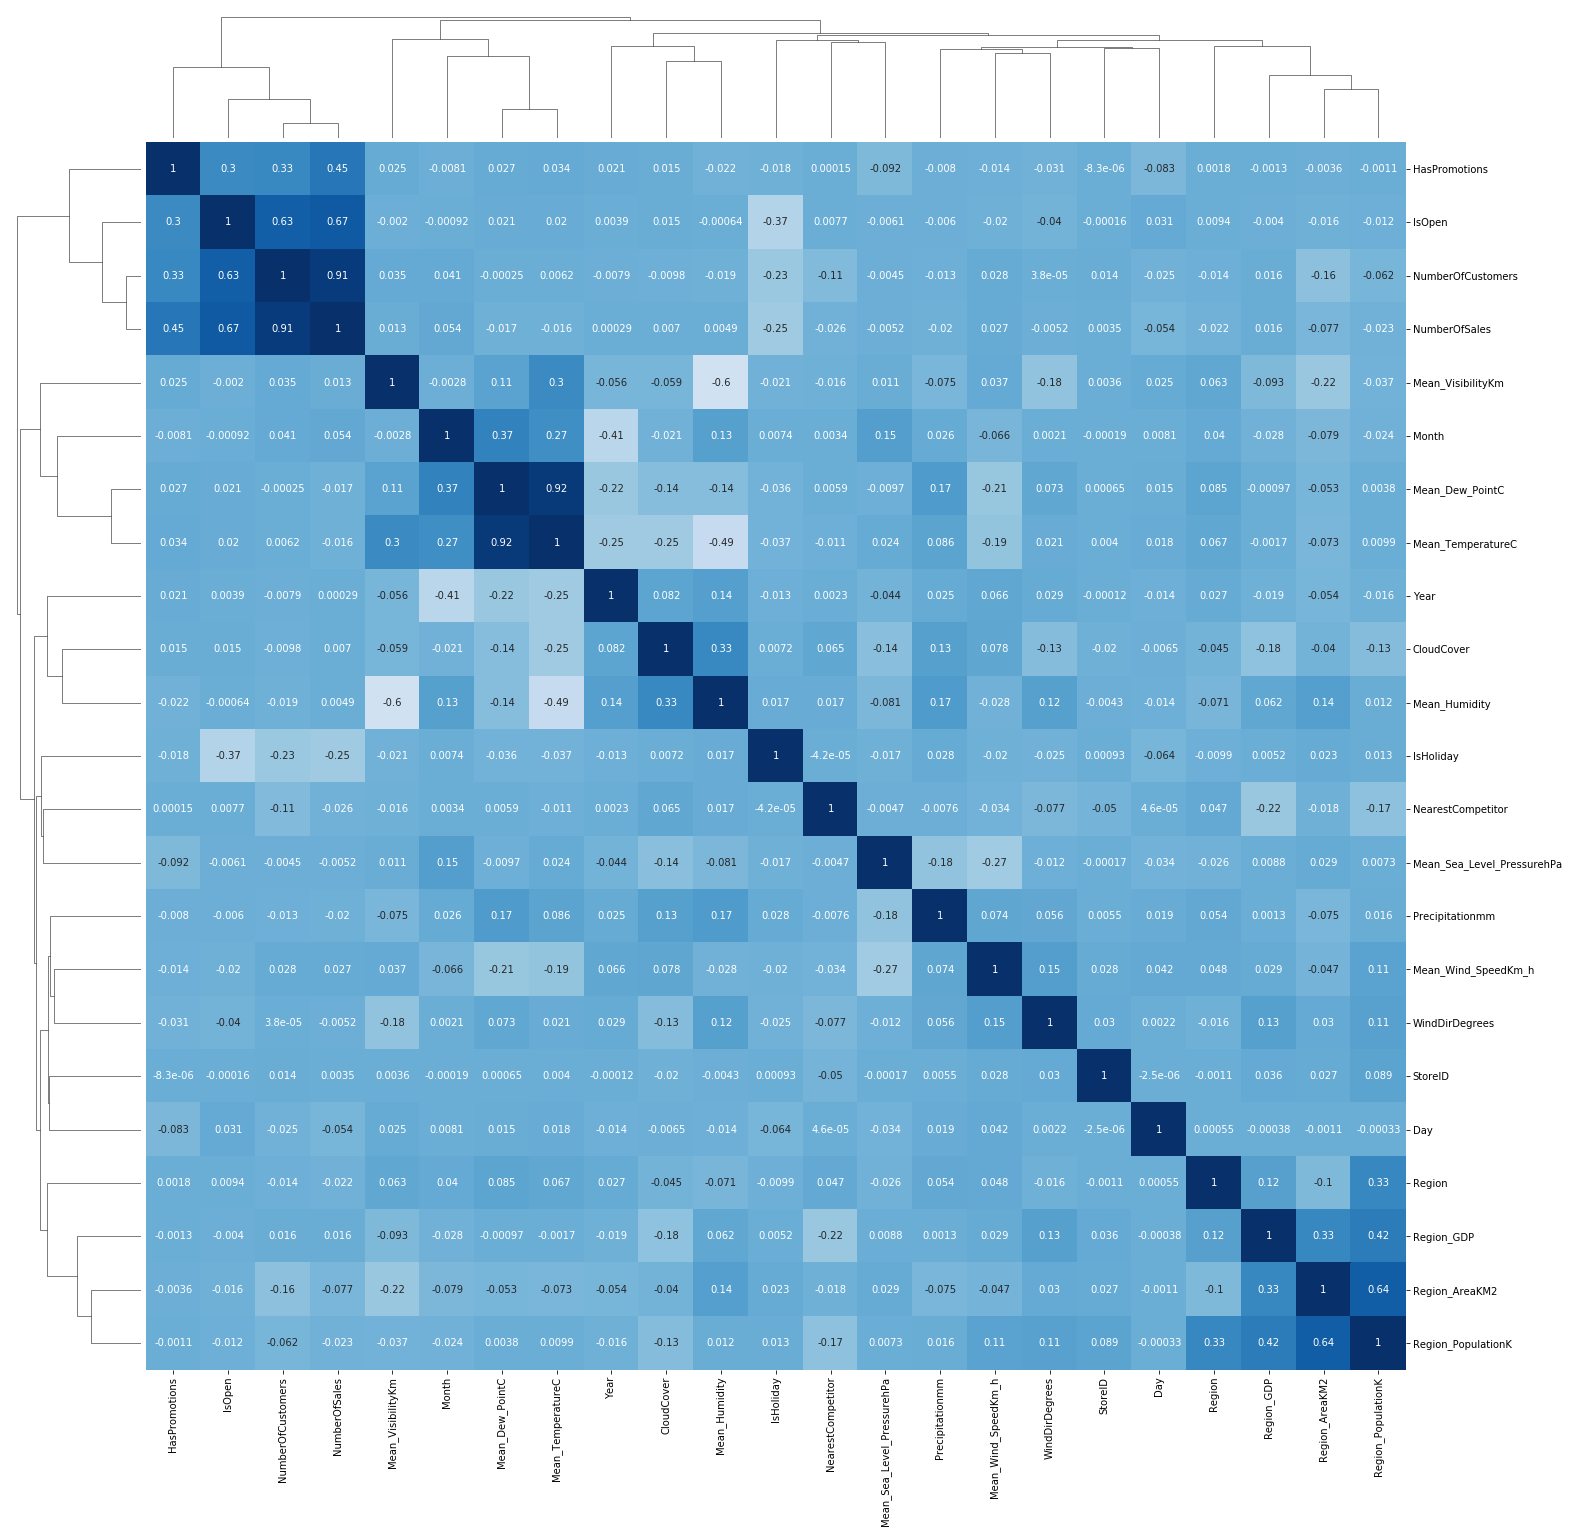

In [36]:
cov = data[numerical_variables].corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(25, 25))
cm.cax.set_visible(False)

And the autocorrelation graph

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


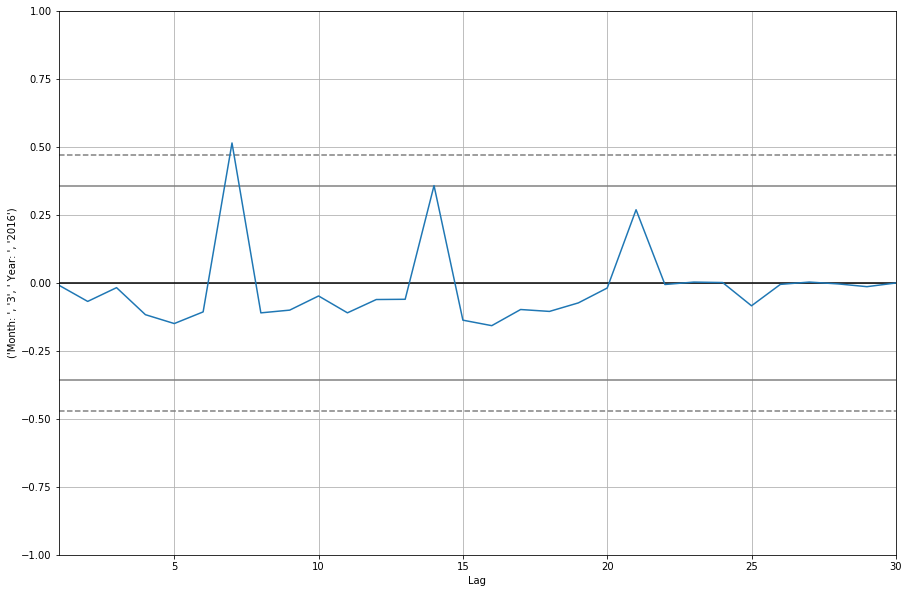

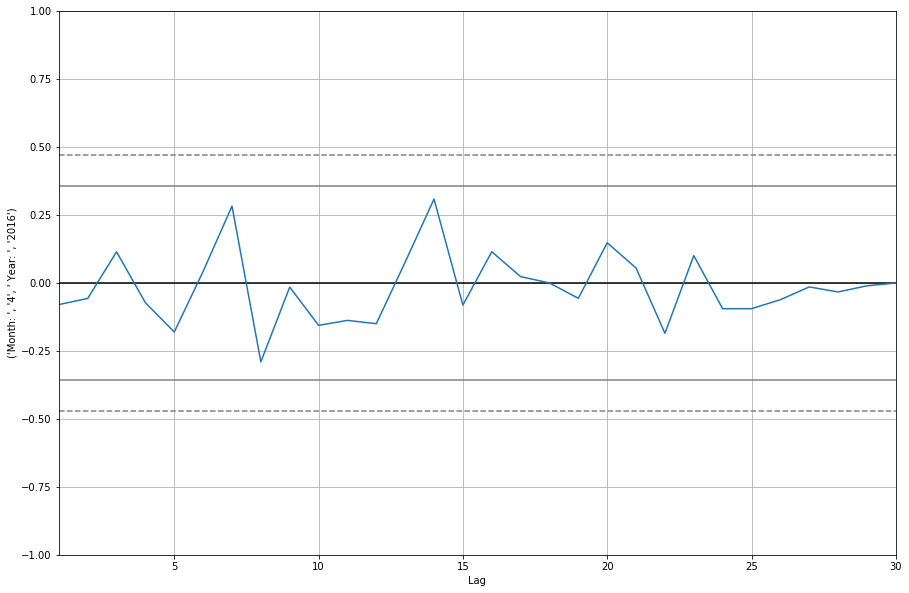

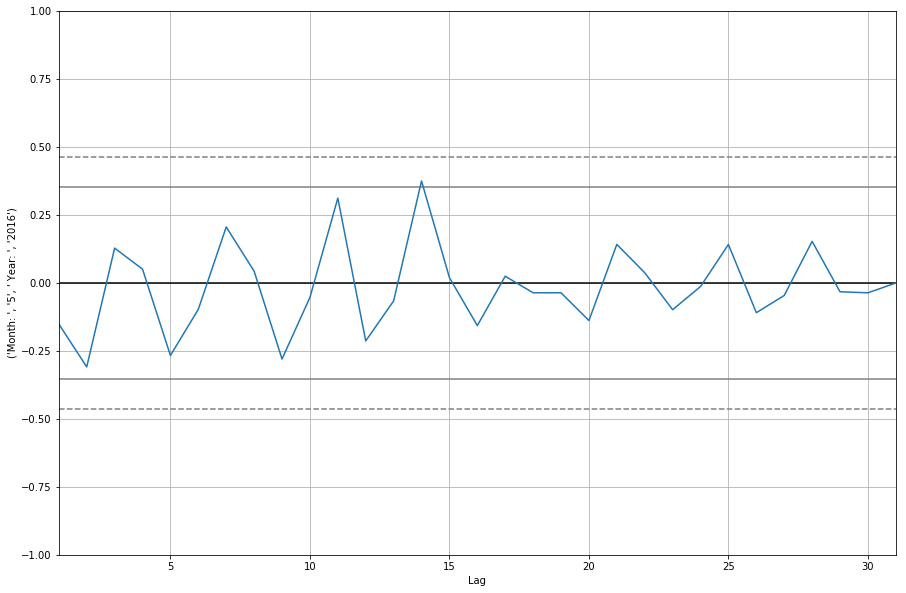

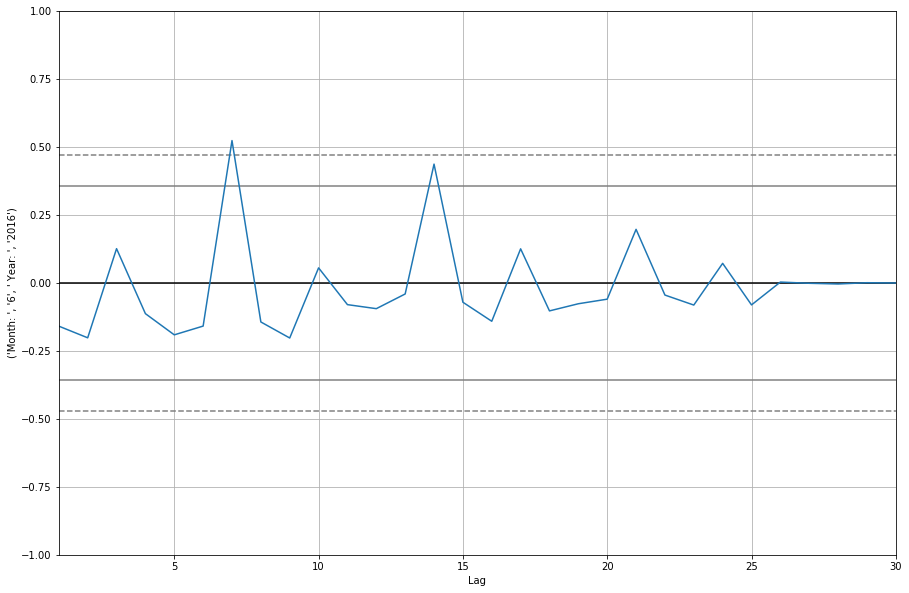

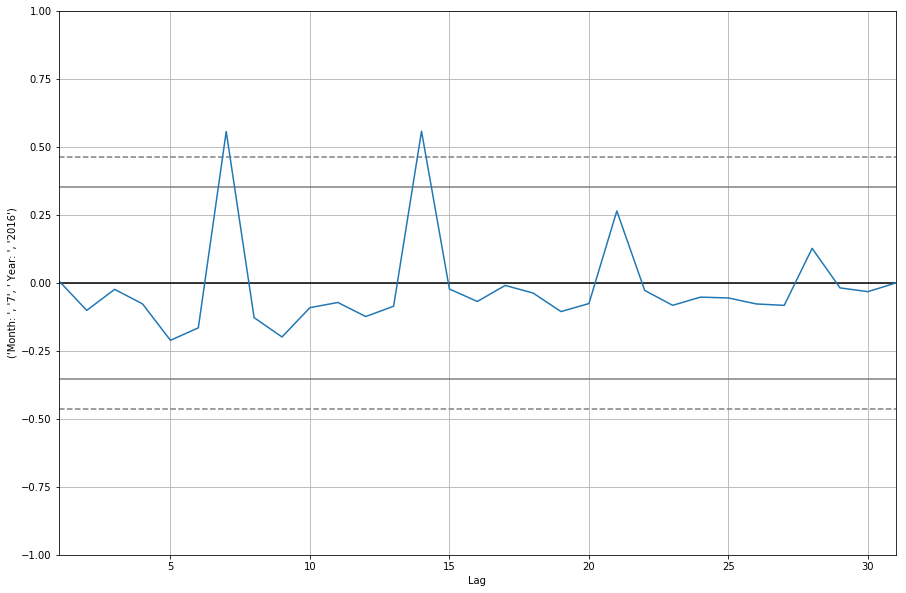

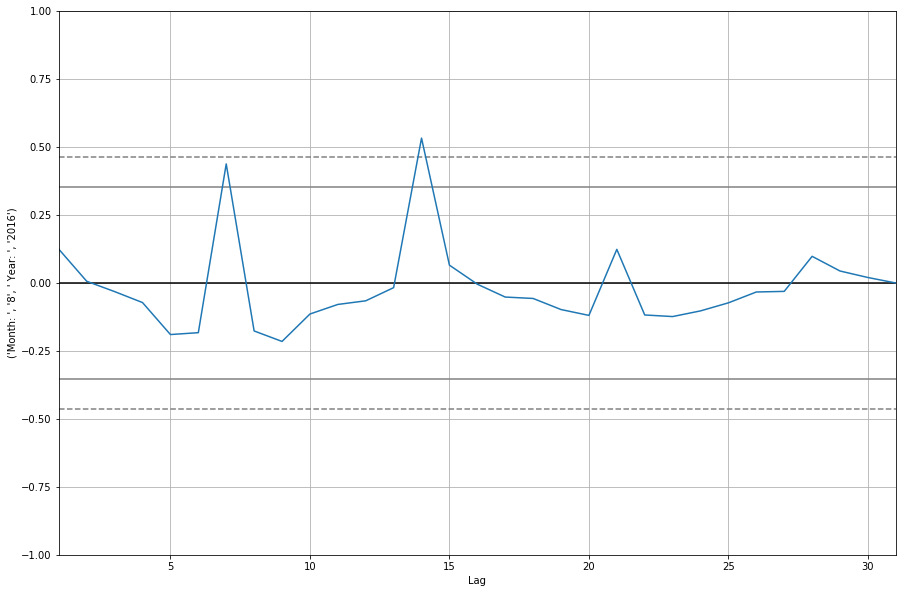

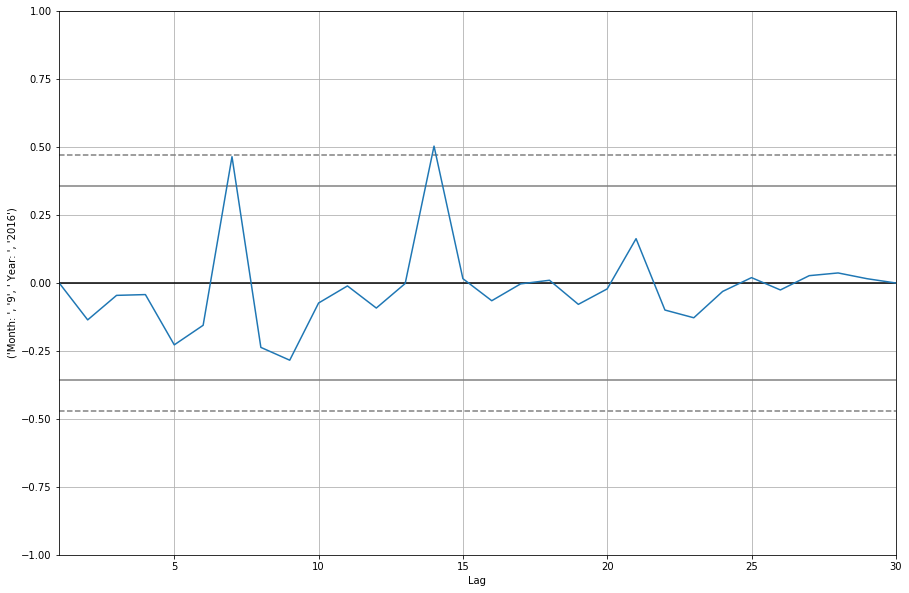

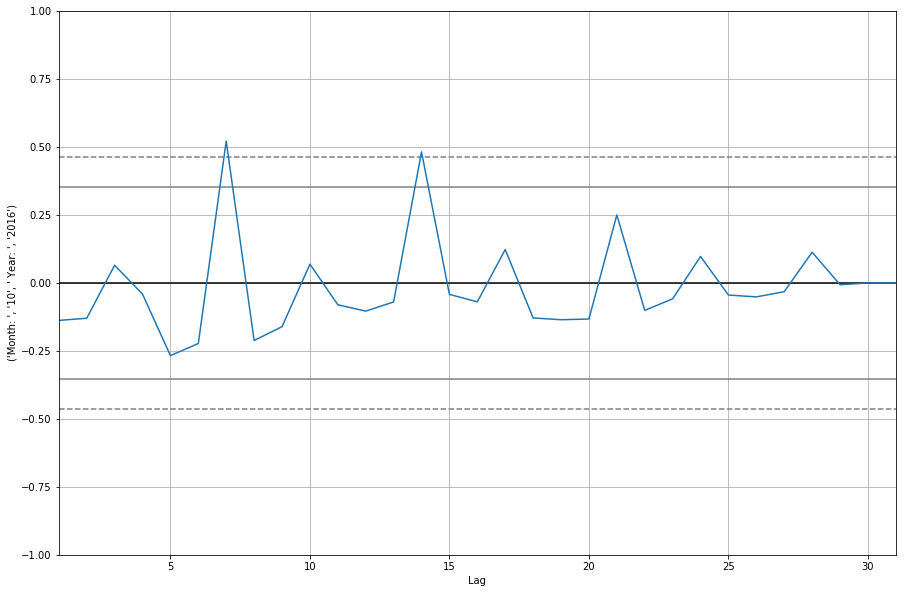

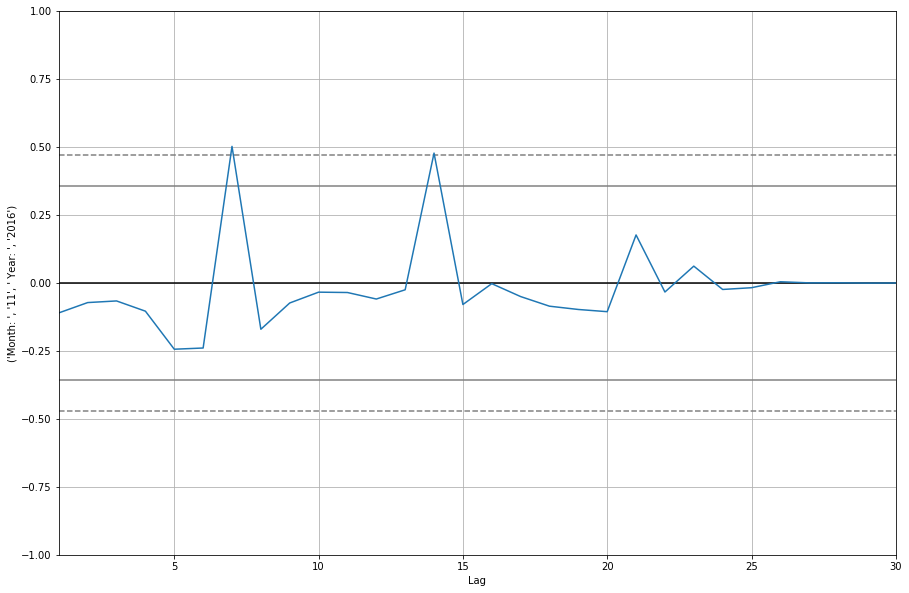

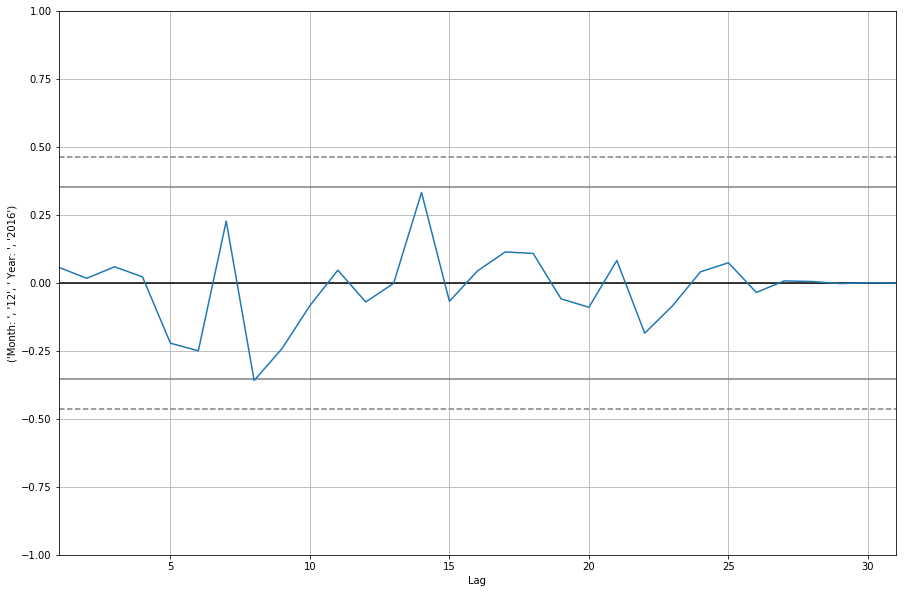

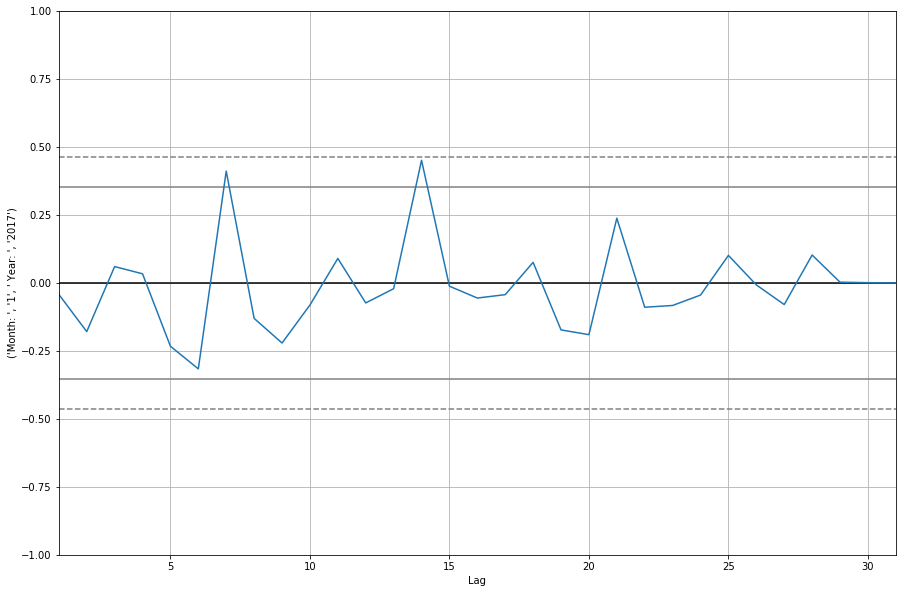

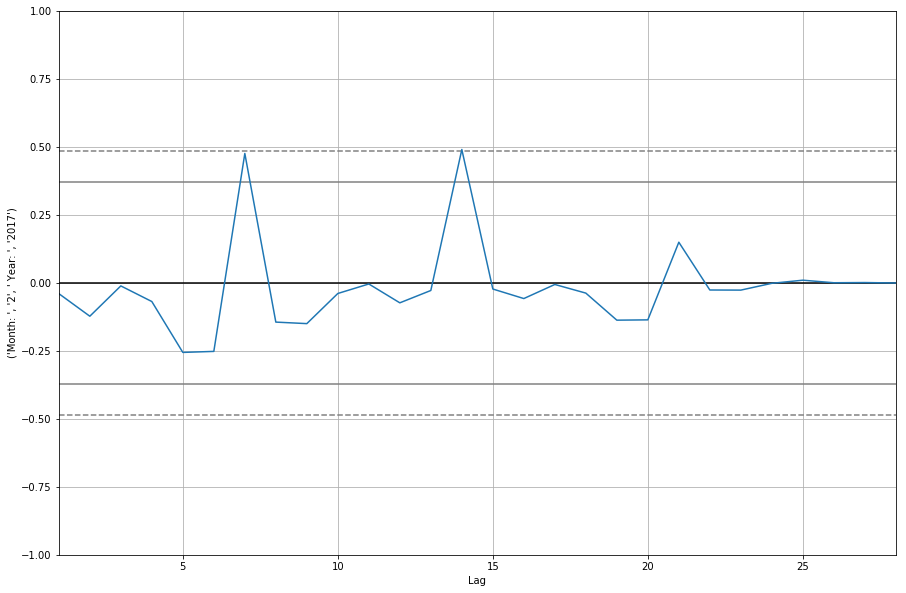

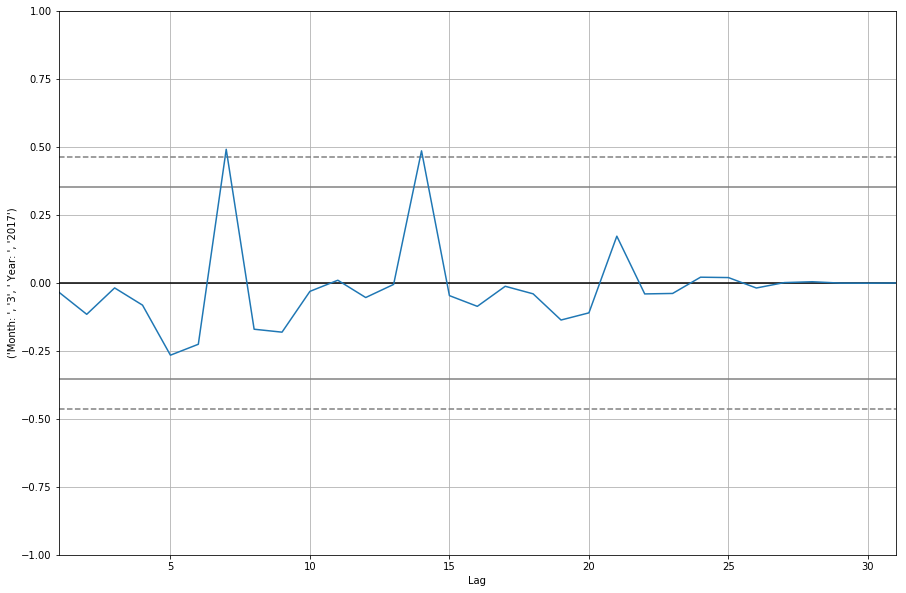

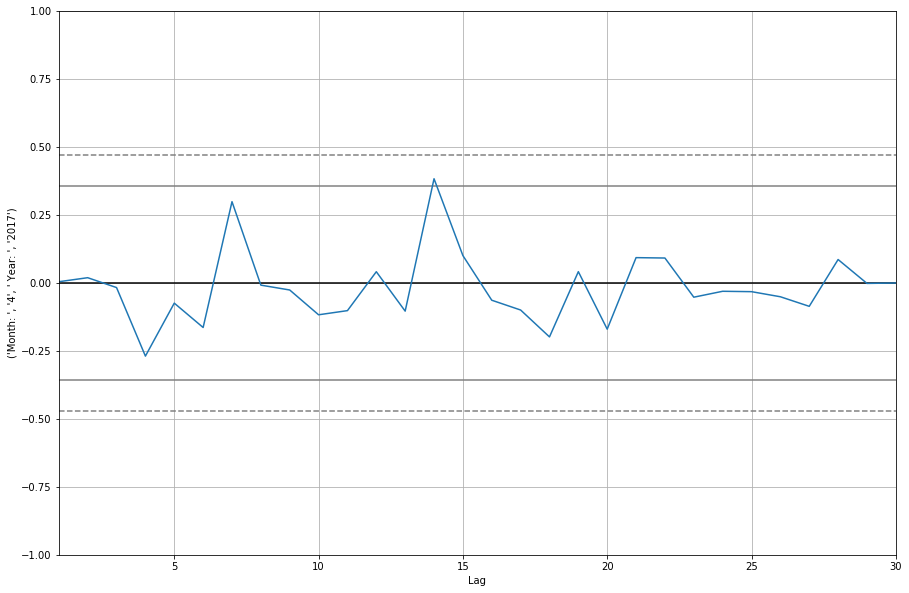

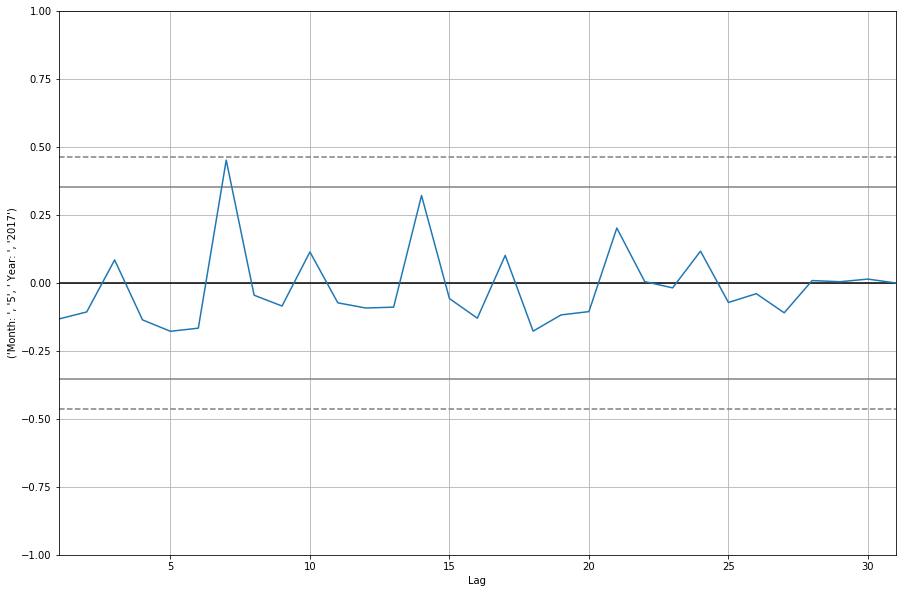

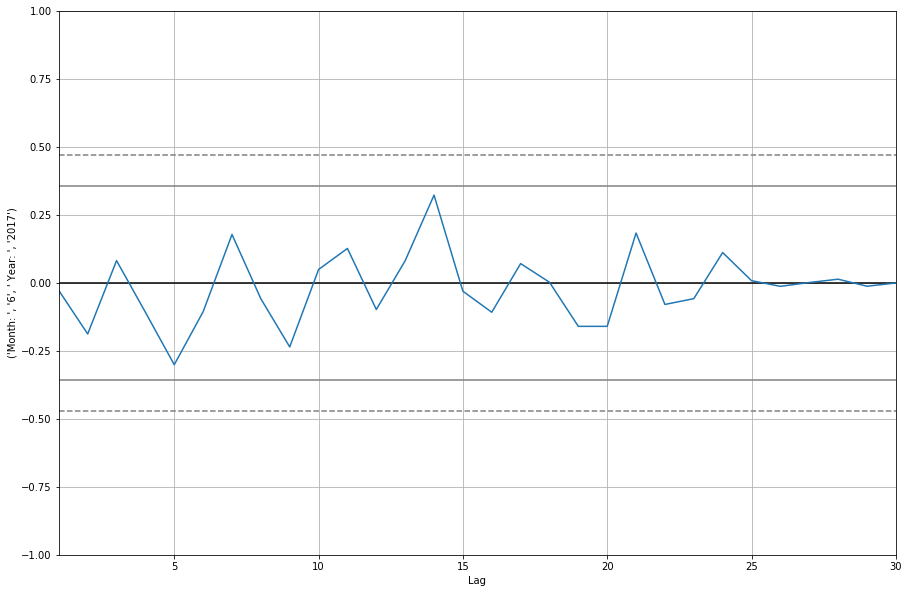

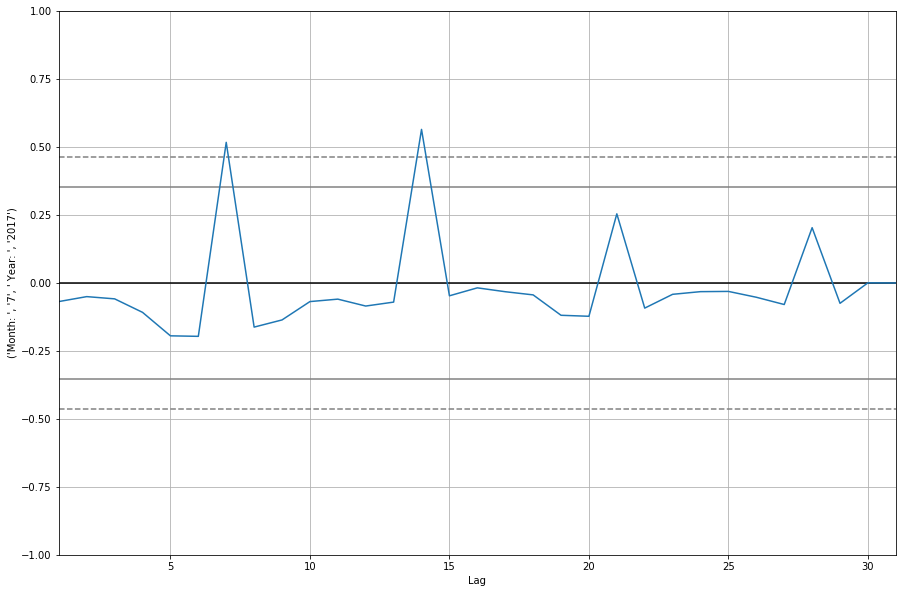

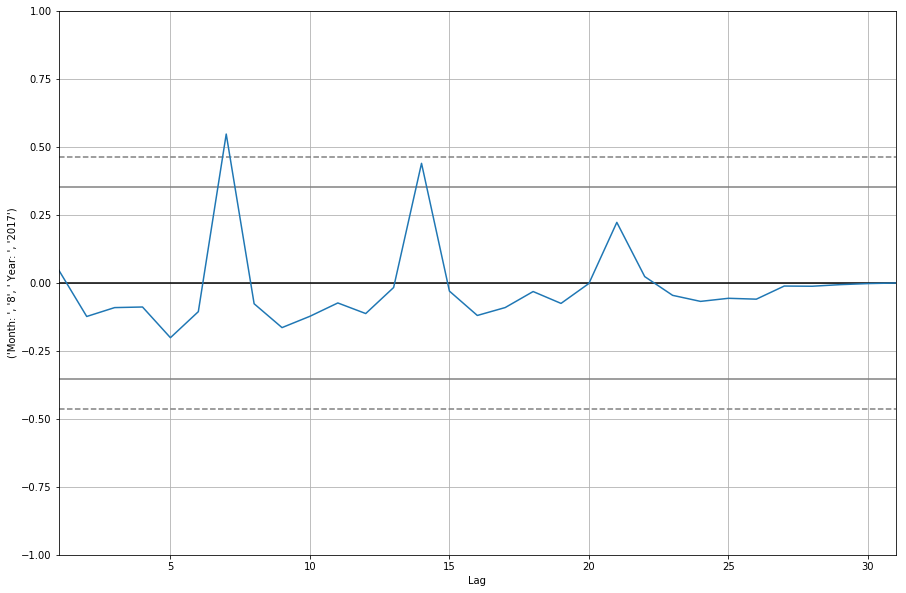

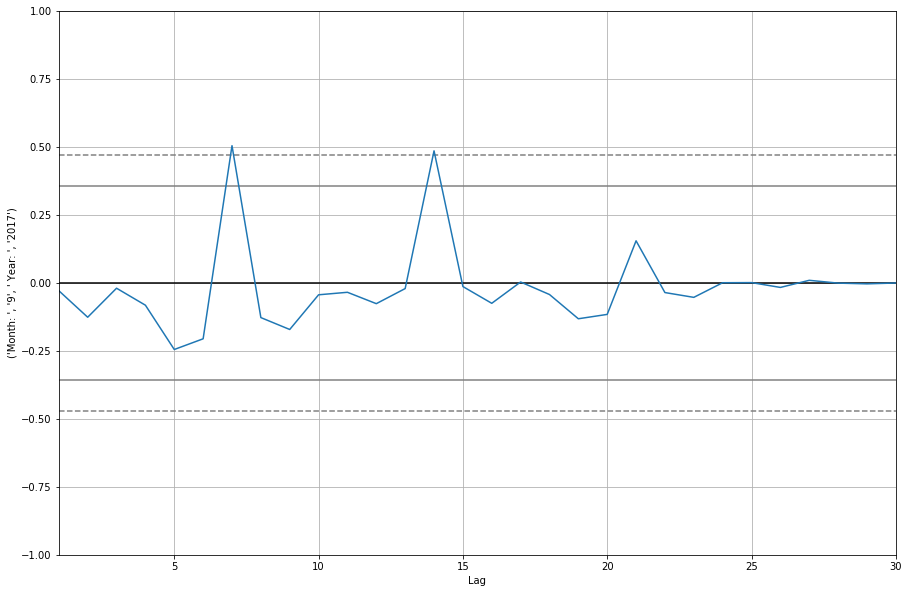

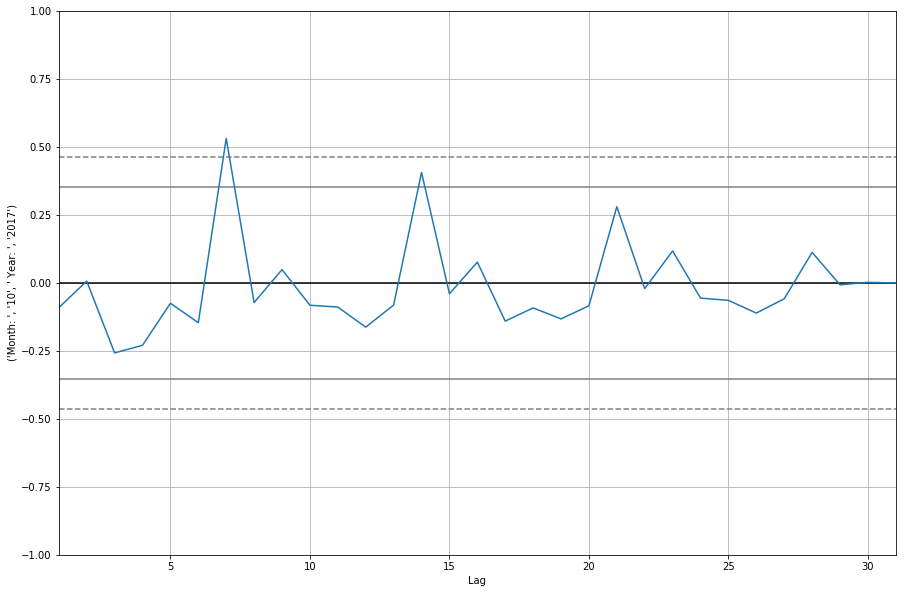

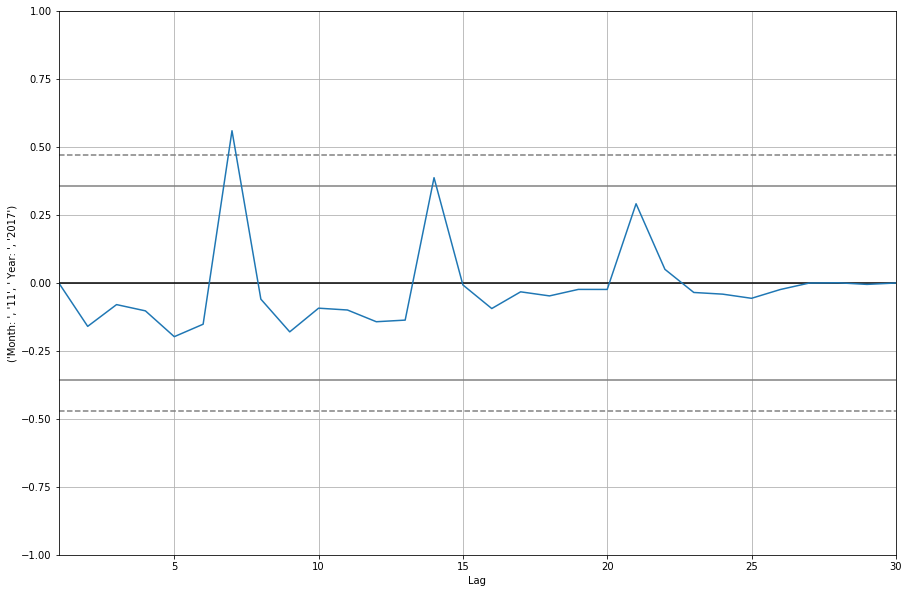

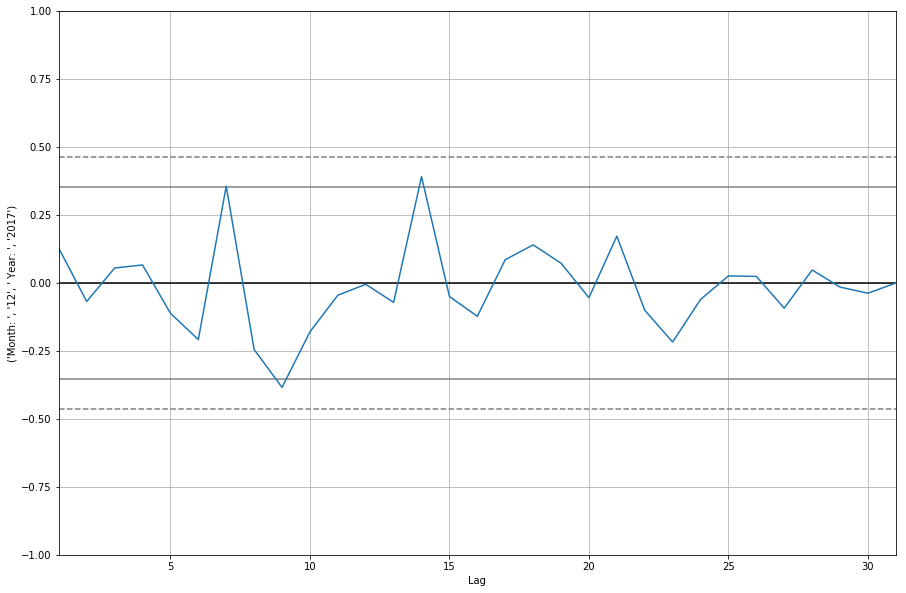

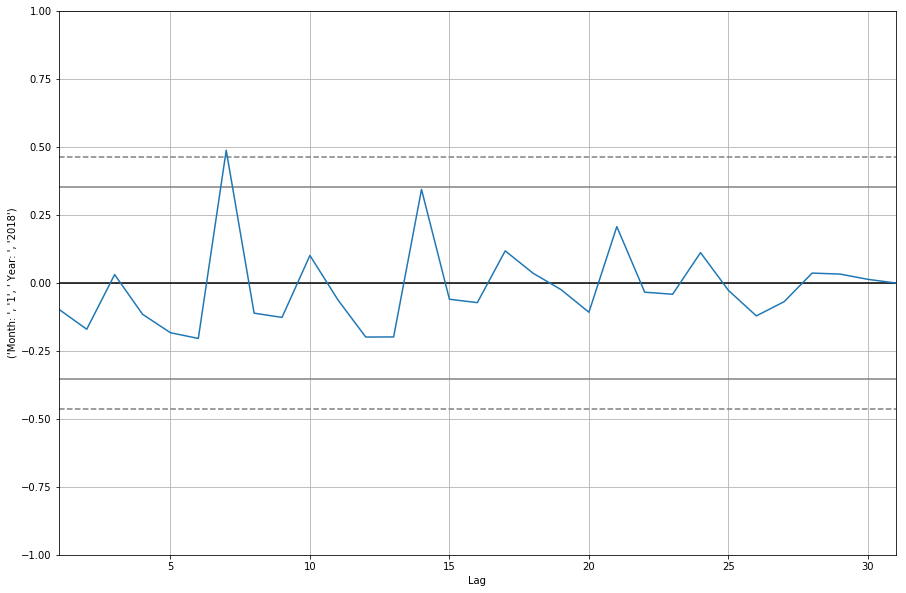

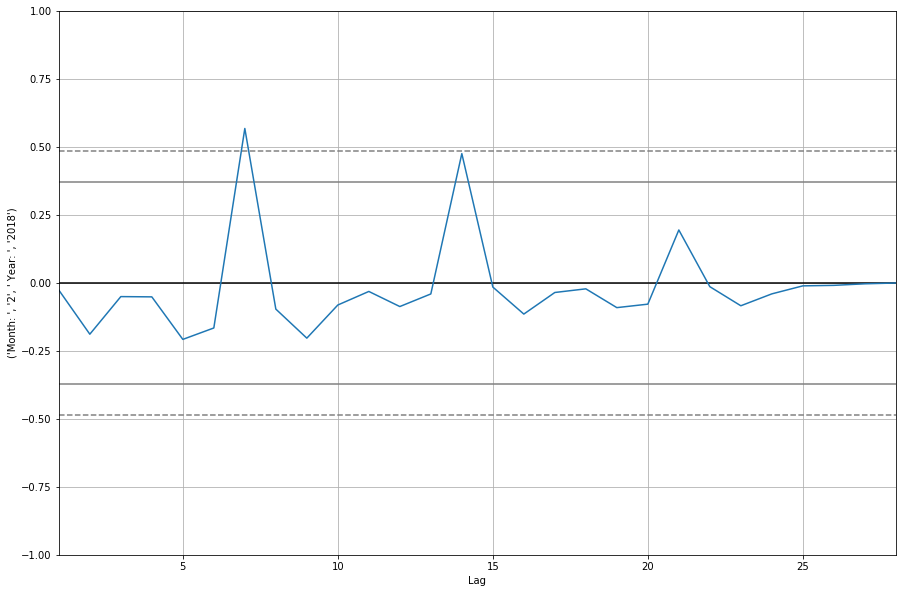

In [37]:
avg_number_of_sales = data.groupby(["Year", "Month", "Day"]).agg({
    "NumberOfSales" : "mean"
}).reset_index()

for y in data["Year"].unique():
    for m in data[data["Year"] == y]["Month"].unique():
        plt.figure()
        autocorrelation_plot(avg_number_of_sales[(avg_number_of_sales["Month"] == m) 
                                                 & (avg_number_of_sales["Year"] == y)]["NumberOfSales"])
        y_plt = "Month: ", str(m), " Year: ", str(y)
        plt.ylabel(y_plt)